# Diffusion HP settings

In [1]:
import sys
sys.path.append('..')
from dotenv import load_dotenv
import torch
import os

%load_ext autoreload
gpu_index=1



# Needed for log_prob
torch.backends.cuda.enable_flash_sdp(False)
torch.backends.cuda.enable_mem_efficient_sdp(False)
torch.backends.cuda.enable_math_sdp(True)


load_dotenv(override=True)

if 'MODEL_DIR' in os.environ:
    model_root = os.environ['MODEL_DIR']
else:
    model_root = './runs'

if 'DATA_DIR' in os.environ:
    data_root = os.environ['DATA_DIR']
else:
    data_root = './data'
    

## Drawing samples

Here we figure out the ideal hyperparameter setting to get samples from our diffusion models.

In [2]:

import os
import torch
from model_zoo.utils import load_model_with_checkpoints



print(model_root)
device = f"cuda:{gpu_index}" if torch.cuda.is_available() else "cpu"

vpsde_models = {
    'fashion-mnist': load_model_with_checkpoints(
        config = {
            'config_dir': 'checkpoints-hg9x5r0n/diffusion_fashion-mnist_interparental_bxnuw7zk_final/run_config.json',
            'checkpoint_dir': 'checkpoints-hg9x5r0n/diffusion_fashion-mnist_interparental_bxnuw7zk_final/checkpoints/de_score-based-VP-diffusion_best_valid.pt',
        },
        root=model_root, 
        device=device,
    ),
    'mnist': load_model_with_checkpoints(
        config = {
            'config_dir': 'checkpoints-hg9x5r0n/diffusion_mnist_tweeting_1ou4vbuo_final/run_config.json',
            'checkpoint_dir': 'checkpoints-hg9x5r0n/diffusion_mnist_tweeting_1ou4vbuo_final/checkpoints/de_score-based-VP-diffusion_best_valid.pt',
        },
        root=model_root, 
        device=device,
    ),
    'omniglot': load_model_with_checkpoints(
        config = {
            'config_dir': 'checkpoints-hg9x5r0n/diffusion_omniglot_polacre_txgcp3yt_final/run_config.json',
            'checkpoint_dir': 'checkpoints-hg9x5r0n/diffusion_omniglot_polacre_txgcp3yt_final/checkpoints/de_score-based-VP-diffusion_best_valid.pt',
        },
        root=model_root, 
        device=device,
    ),
    'emnist': load_model_with_checkpoints(
        config = {
            'config_dir': 'checkpoints-hg9x5r0n/diffusion_emnist_iridomyrmex_7wnmityc_final/run_config.json',
            'checkpoint_dir': 'checkpoints-hg9x5r0n/diffusion_emnist_iridomyrmex_7wnmityc_final/checkpoints/de_score-based-VP-diffusion_best_valid.pt',
        },
        root=model_root, 
        device=device,
    ),
    'cifar10': load_model_with_checkpoints(
        config = {
            'config_dir': 'checkpoints-znod8v3z/diffusion_cifar10_distinctions_aep6z5pr_final/run_config.json',
            'checkpoint_dir': 'checkpoints-znod8v3z/diffusion_cifar10_distinctions_aep6z5pr_final/checkpoints/de_score-based-VP-diffusion_latest.pt',
        },
        root=model_root, 
        device=device,
    ),
    'svhn': load_model_with_checkpoints(
        config = {
            'config_dir': 'checkpoints-znod8v3z/diffusion_svhn_regretless_ixiwzx2l_final/run_config.json',
            'checkpoint_dir': 'checkpoints-znod8v3z/diffusion_svhn_regretless_ixiwzx2l_final/checkpoints/de_score-based-VP-diffusion_latest.pt',
        },
        root=model_root, 
        device=device,
    ),
    'celeba-small': load_model_with_checkpoints(
        config = {
            'config_dir': 'checkpoints-znod8v3z/diffusion_celeba-small_petroleum_uhtqybca_final/run_config.json',
            'checkpoint_dir': 'checkpoints-znod8v3z/diffusion_celeba-small_petroleum_uhtqybca_final/checkpoints/de_score-based-VP-diffusion_latest.pt',
        },
        root=model_root, 
        device=device,
    ),
    'tiny-imagenet': load_model_with_checkpoints(
        config = {
            'config_dir': 'checkpoints-znod8v3z/diffusion_tiny-imagenet_autolavage_84hvhvrz_final/run_config.json',
            'checkpoint_dir': 'checkpoints-znod8v3z/diffusion_tiny-imagenet_autolavage_84hvhvrz_final/checkpoints/de_score-based-VP-diffusion_latest.pt',
        },
        root=model_root, 
        device=device,
    ),
    
}

for model in vpsde_models.values():
    model.to(device)

print("Done loading!")

/data2/hamid/miniconda3/envs/ood-detection/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


/data2/hamid/dysweep_logs/
Done loading!


Now let's look at samples

--- samples from fashion-mnist ---


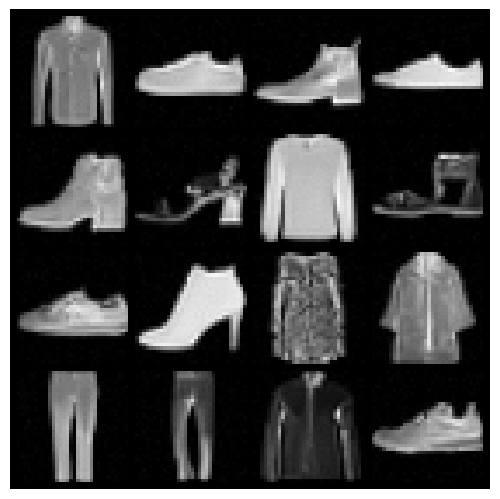

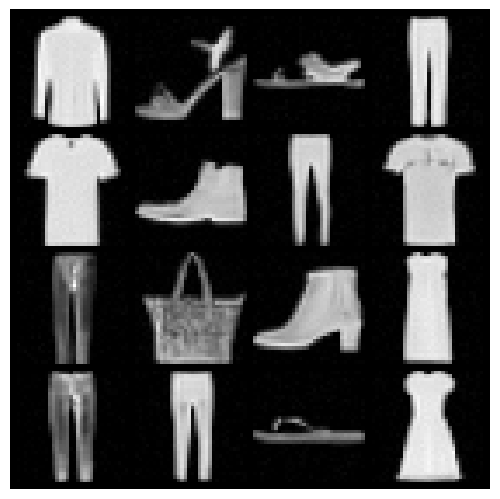

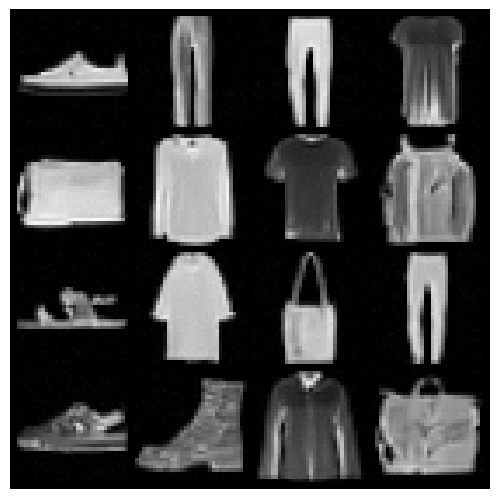

--- samples from mnist ---


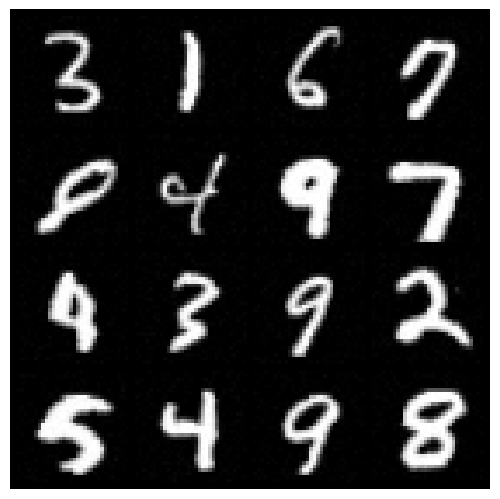

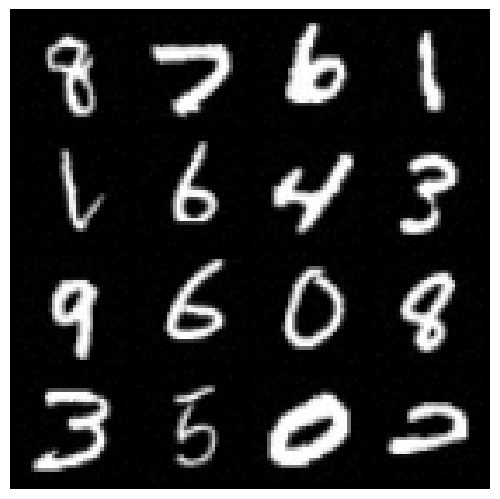

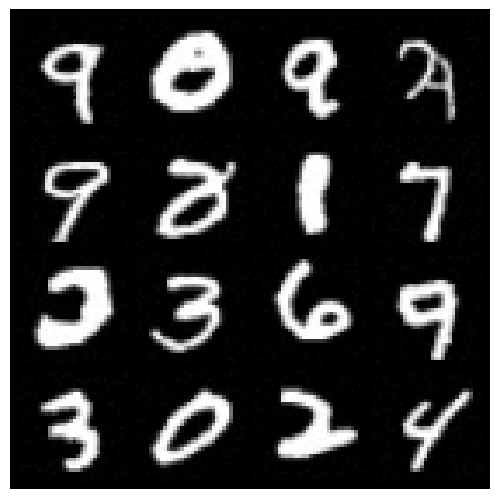

--- samples from omniglot ---


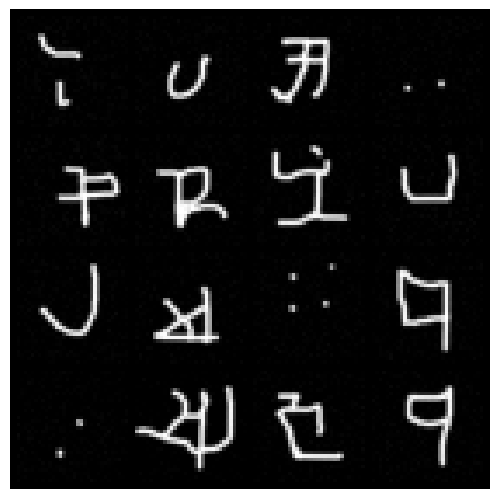

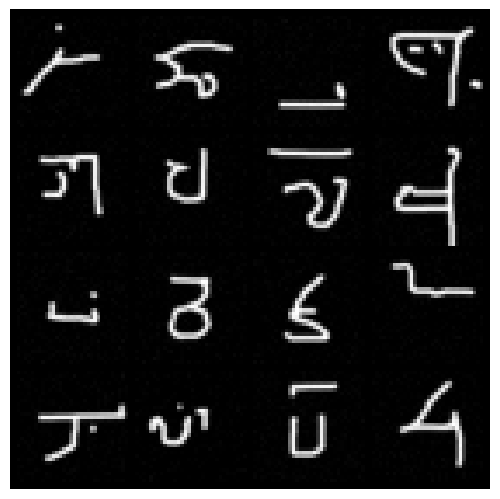

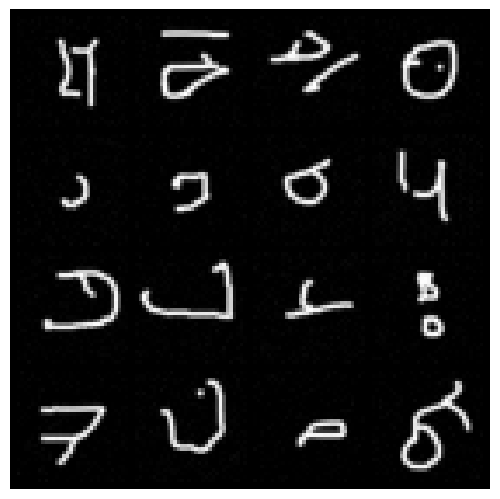

--- samples from emnist ---


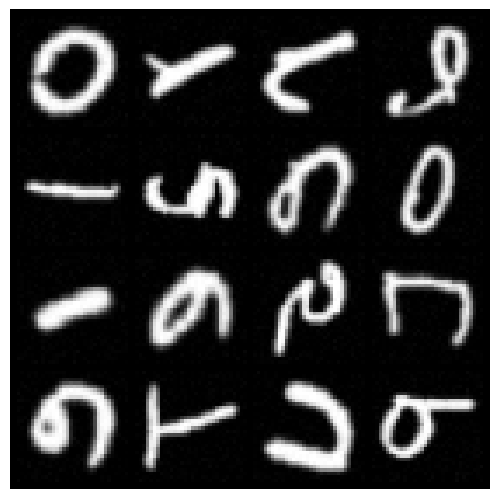

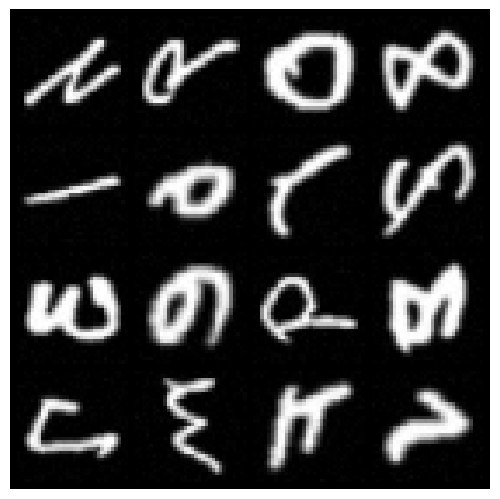

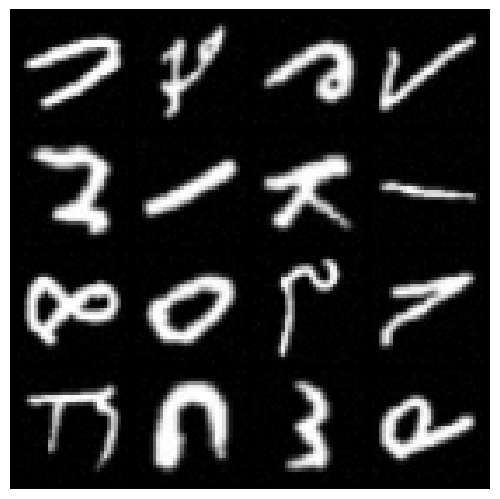

--- samples from cifar10 ---


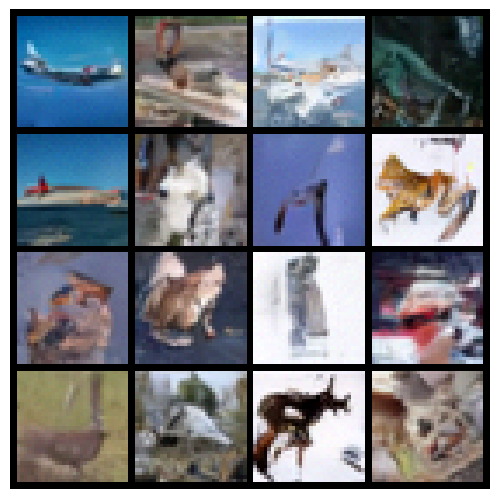

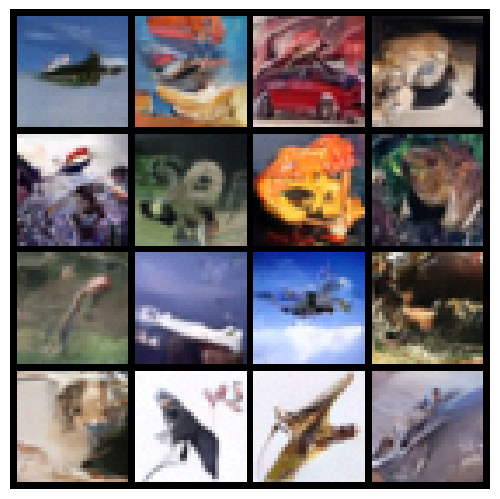

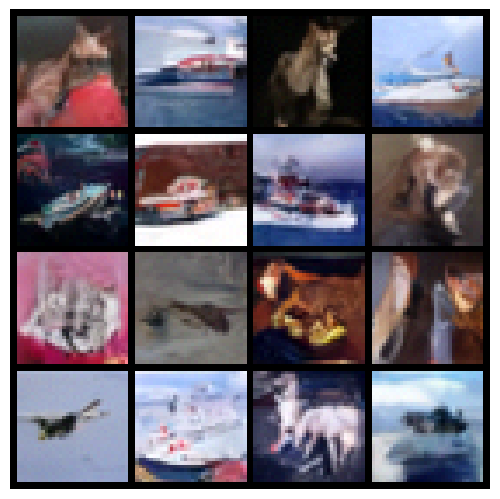

--- samples from svhn ---


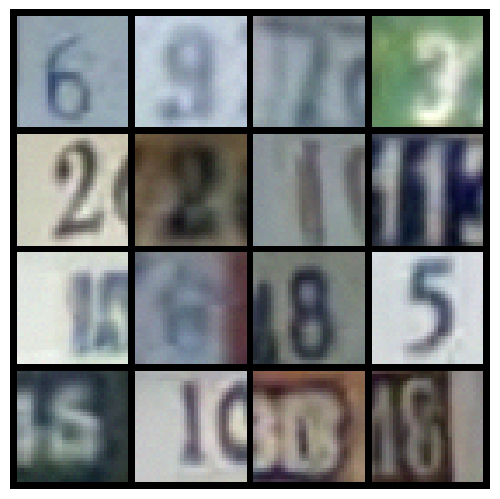

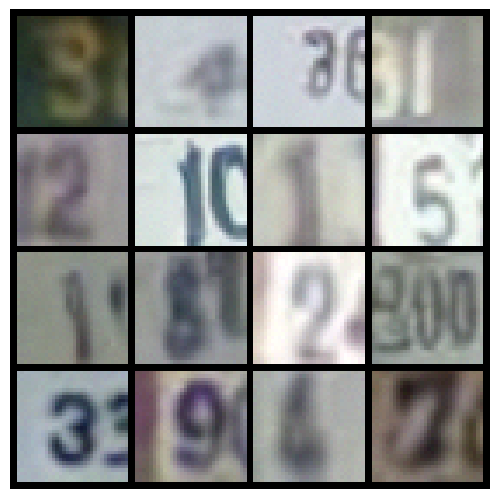

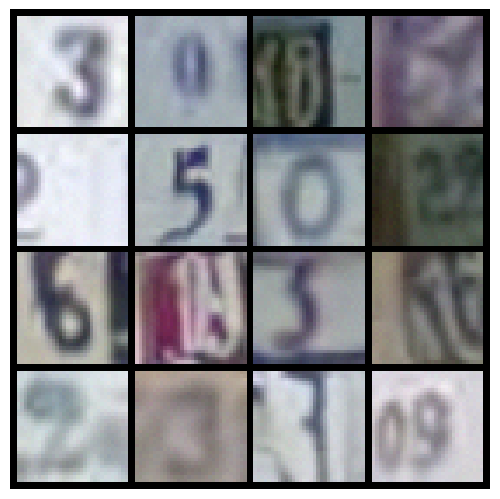

--- samples from celeba-small ---


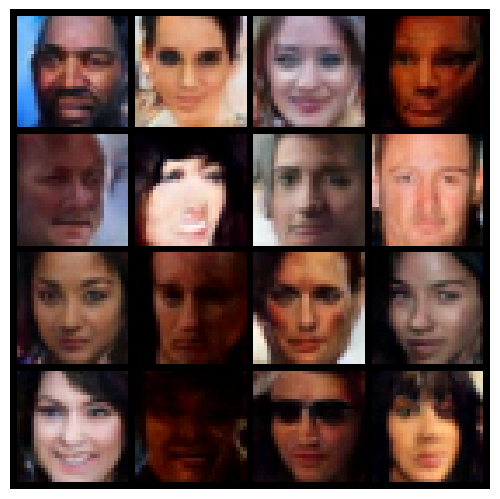

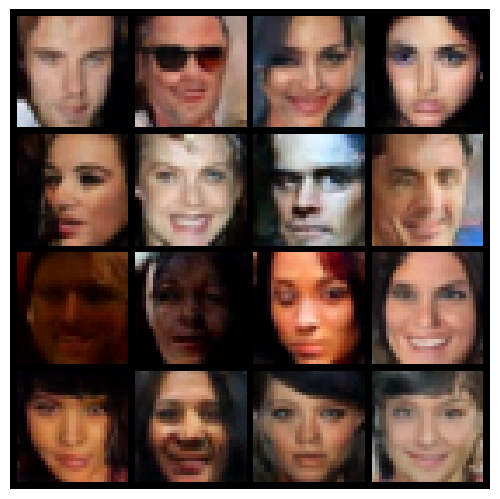

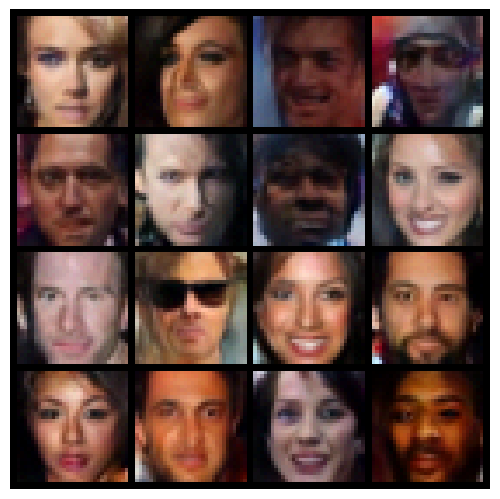

--- samples from tiny-imagenet ---


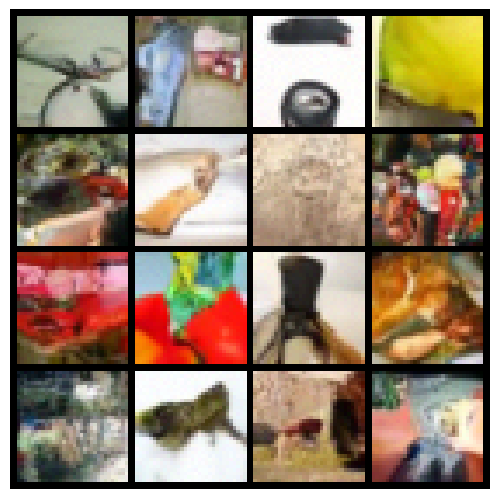

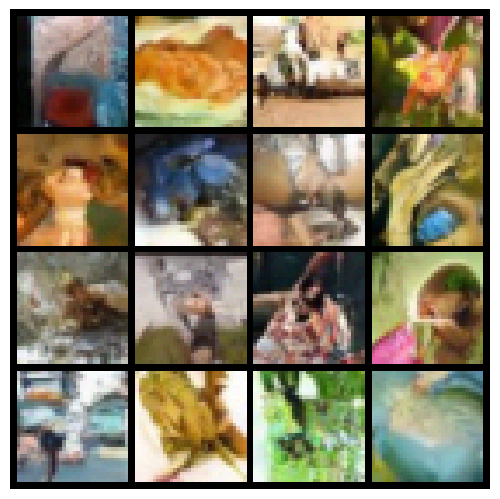

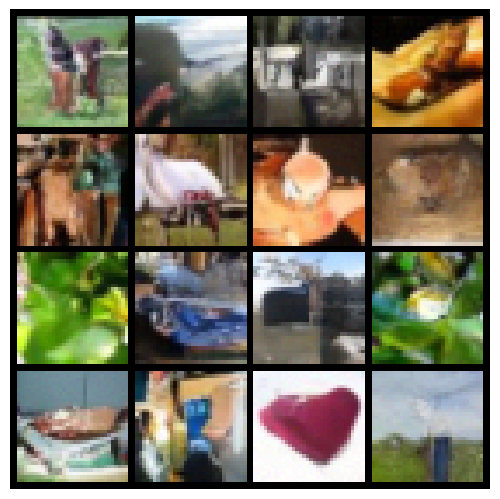

In [4]:
import matplotlib.pyplot as plt
import torchvision

repeat = 3
for dset in vpsde_models.keys():
    print(f"--- samples from {dset} ---")
    model = vpsde_models[dset]
    idx = 0
    samples_all = model.sample(16 * repeat, steps=1000, eps=1e-4) 
    for samples in samples_all.split(16):
        samples = torch.clip(torchvision.utils.make_grid(samples, nrow=4)/255., 0, 1)
        img = samples.permute(1, 2, 0).cpu().numpy()
        plt.imshow(img)
        plt.axis('off')  # Turns off the axis
        plt.subplots_adjust(left=0, right=1, top=1, bottom=0)  # Adjust subplot parameters
        idx += 1
        plt.savefig(f'./figures/samples_DM_{dset}_{idx}.png', bbox_inches='tight', pad_inches=0)
        plt.show()

## 